In [1]:
library(TSA)
library(readxl)
library(tseries)
library(forecast)
library(tidyverse)
library(ggplot2)

options(repr.plot.width = 18, repr.plot.height = 8)

Warning message:
"pacote 'TSA' foi compilado no R versão 4.4.3"

Anexando pacote: 'TSA'


Os seguintes objetos são mascarados por 'package:stats':

    acf, arima


O seguinte objeto é mascarado por 'package:utils':

    tar


Warning message:
"pacote 'readxl' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'tseries' foi compilado no R versão 4.4.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"pacote 'forecast' foi compilado no R versão 4.4.3"
Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Warning message:
"pacote 'tidyverse' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'ggplot2' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'tidyr' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'readr' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'purrr' foi compilado no R versão 4.4.3"
Warning message:
"pacote

In [2]:
df <- read_excel("ICV.xls")

In [3]:
# Converter para série temporal
serie_ts <- ts(df$ICV, start = c(1970, 1), frequency = 12)

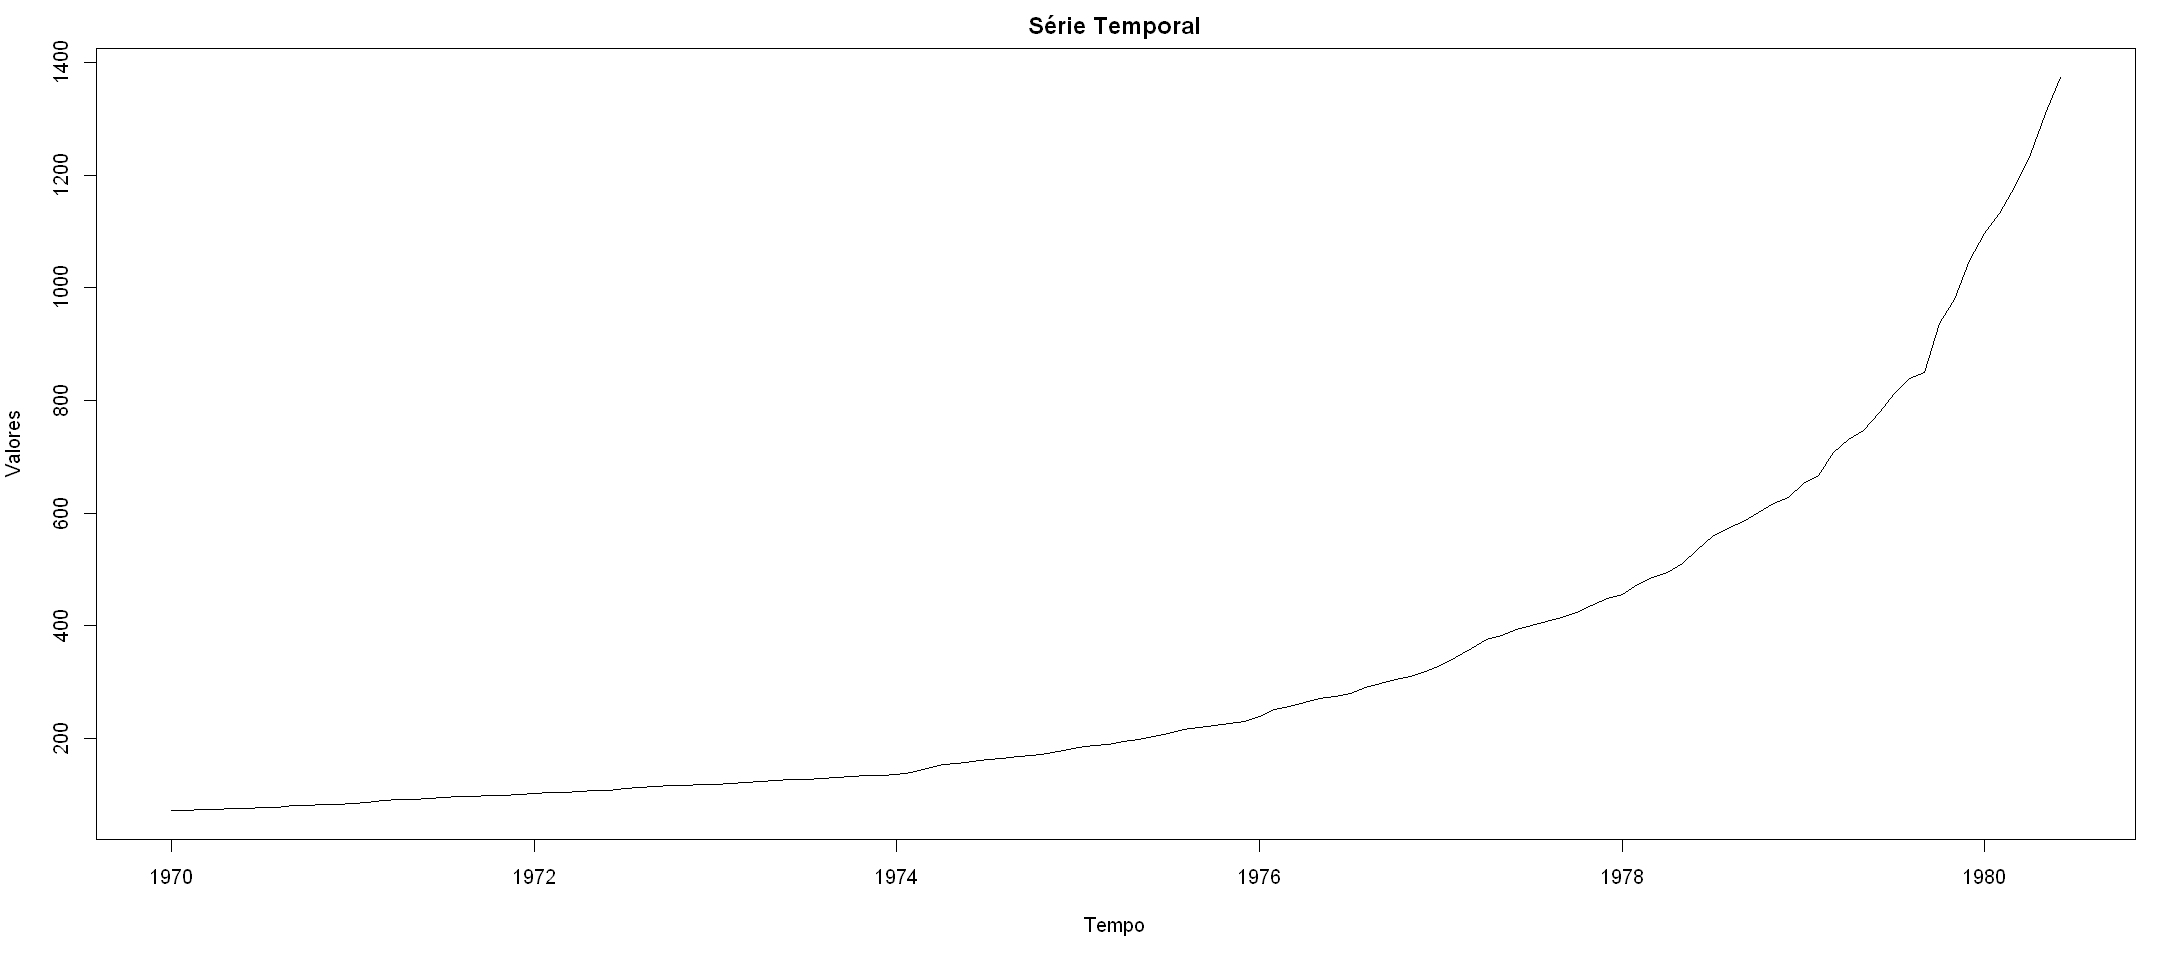

In [4]:
par(bg = "white", mfrow = c(1, 1), mar = c(5, 4, 2, 1))

plot.ts(serie_ts, main = "Série Temporal", ylab = "Valores", xlab = "Tempo")

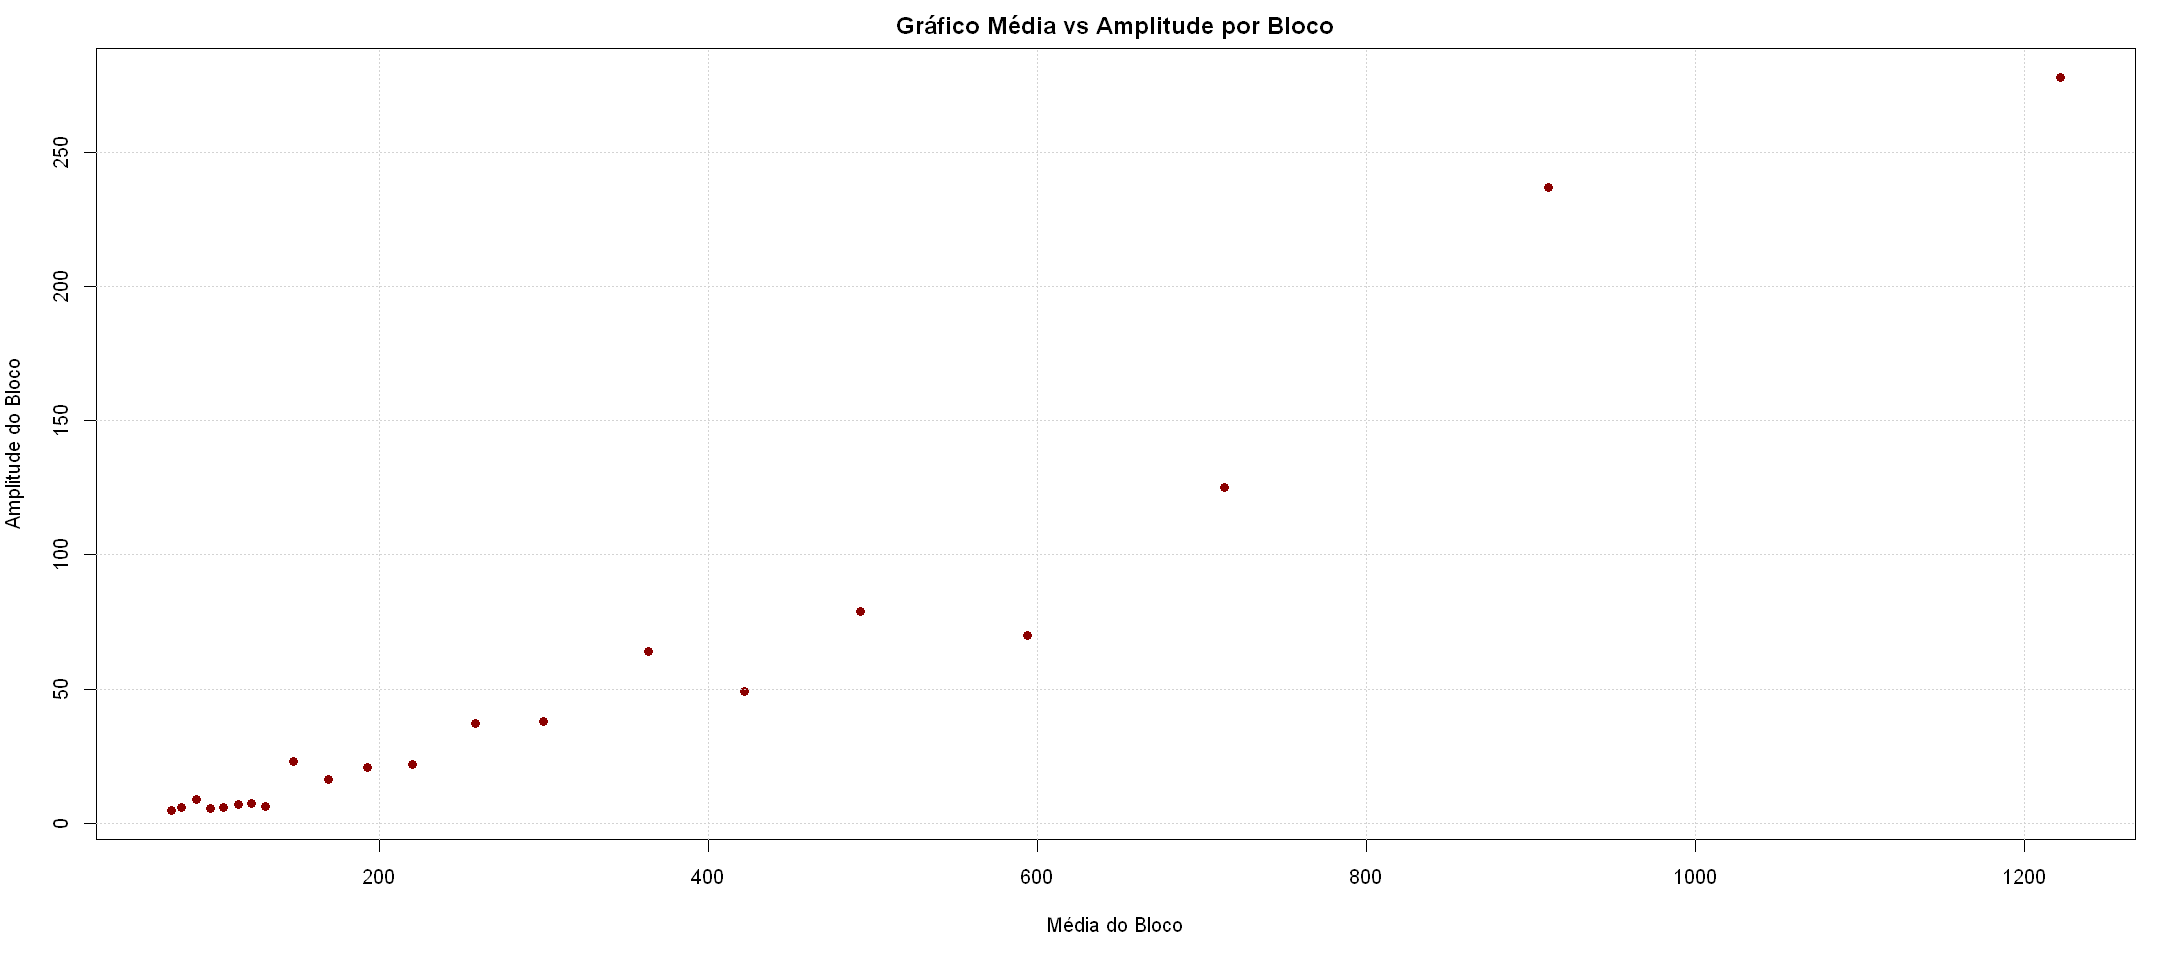

In [5]:
par(bg = "white", mfrow = c(1, 1), mar = c(5, 4, 2, 1))

# Tamanho da janela (por exemplo, 12 meses)
janela <- 6


# Inicializar vetores
medias <- numeric()
amplitudes <- numeric()


# Loop por blocos
for (i in seq(1, length(serie_ts) - janela + 1, by = janela)) {
  bloco <- serie_ts[i:(i + janela - 1)]
  medias <- c(medias, mean(bloco))
  amplitudes <- c(amplitudes, max(bloco) - min(bloco))
}


# Gráfico de dispersão: Média vs Amplitude
plot(medias, amplitudes,
     main = "Gráfico Média vs Amplitude por Bloco",
     xlab = "Média do Bloco",
     ylab = "Amplitude do Bloco",
     pch = 19,
     col = "darkred")
grid()

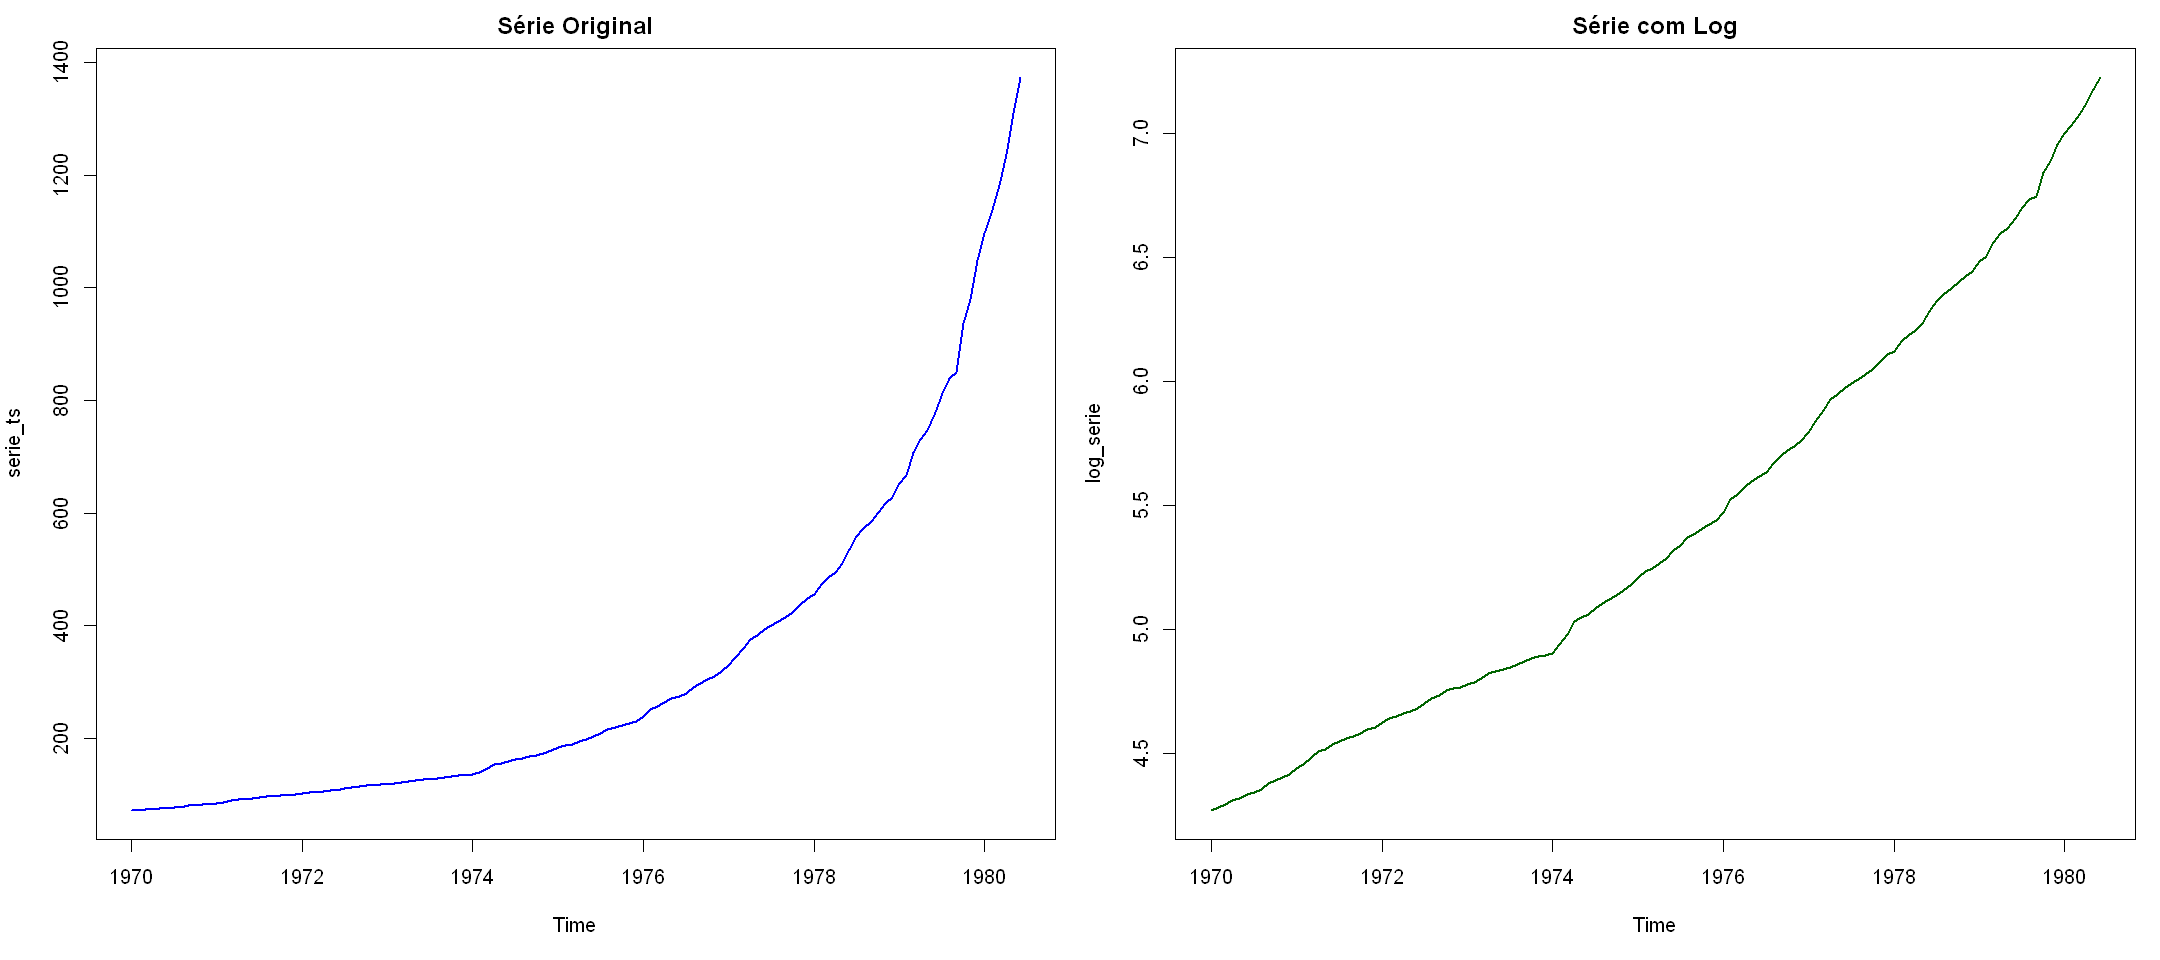

In [6]:
# Plot original
log_serie = log(serie_ts)

par(bg = "white", mfrow = c(1, 2), mar = c(5, 4, 2, 1))

plot(serie_ts, main = "Série Original", col = "blue", lwd = 2)
plot(log_serie, main = "Série com Log", col = "darkgreen", lwd = 2)

# Reset layout
par(mfrow = c(1, 1))

[1] 2

Warning message in adf.test(serie_diff):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  serie_diff
Dickey-Fuller = -8.2244, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


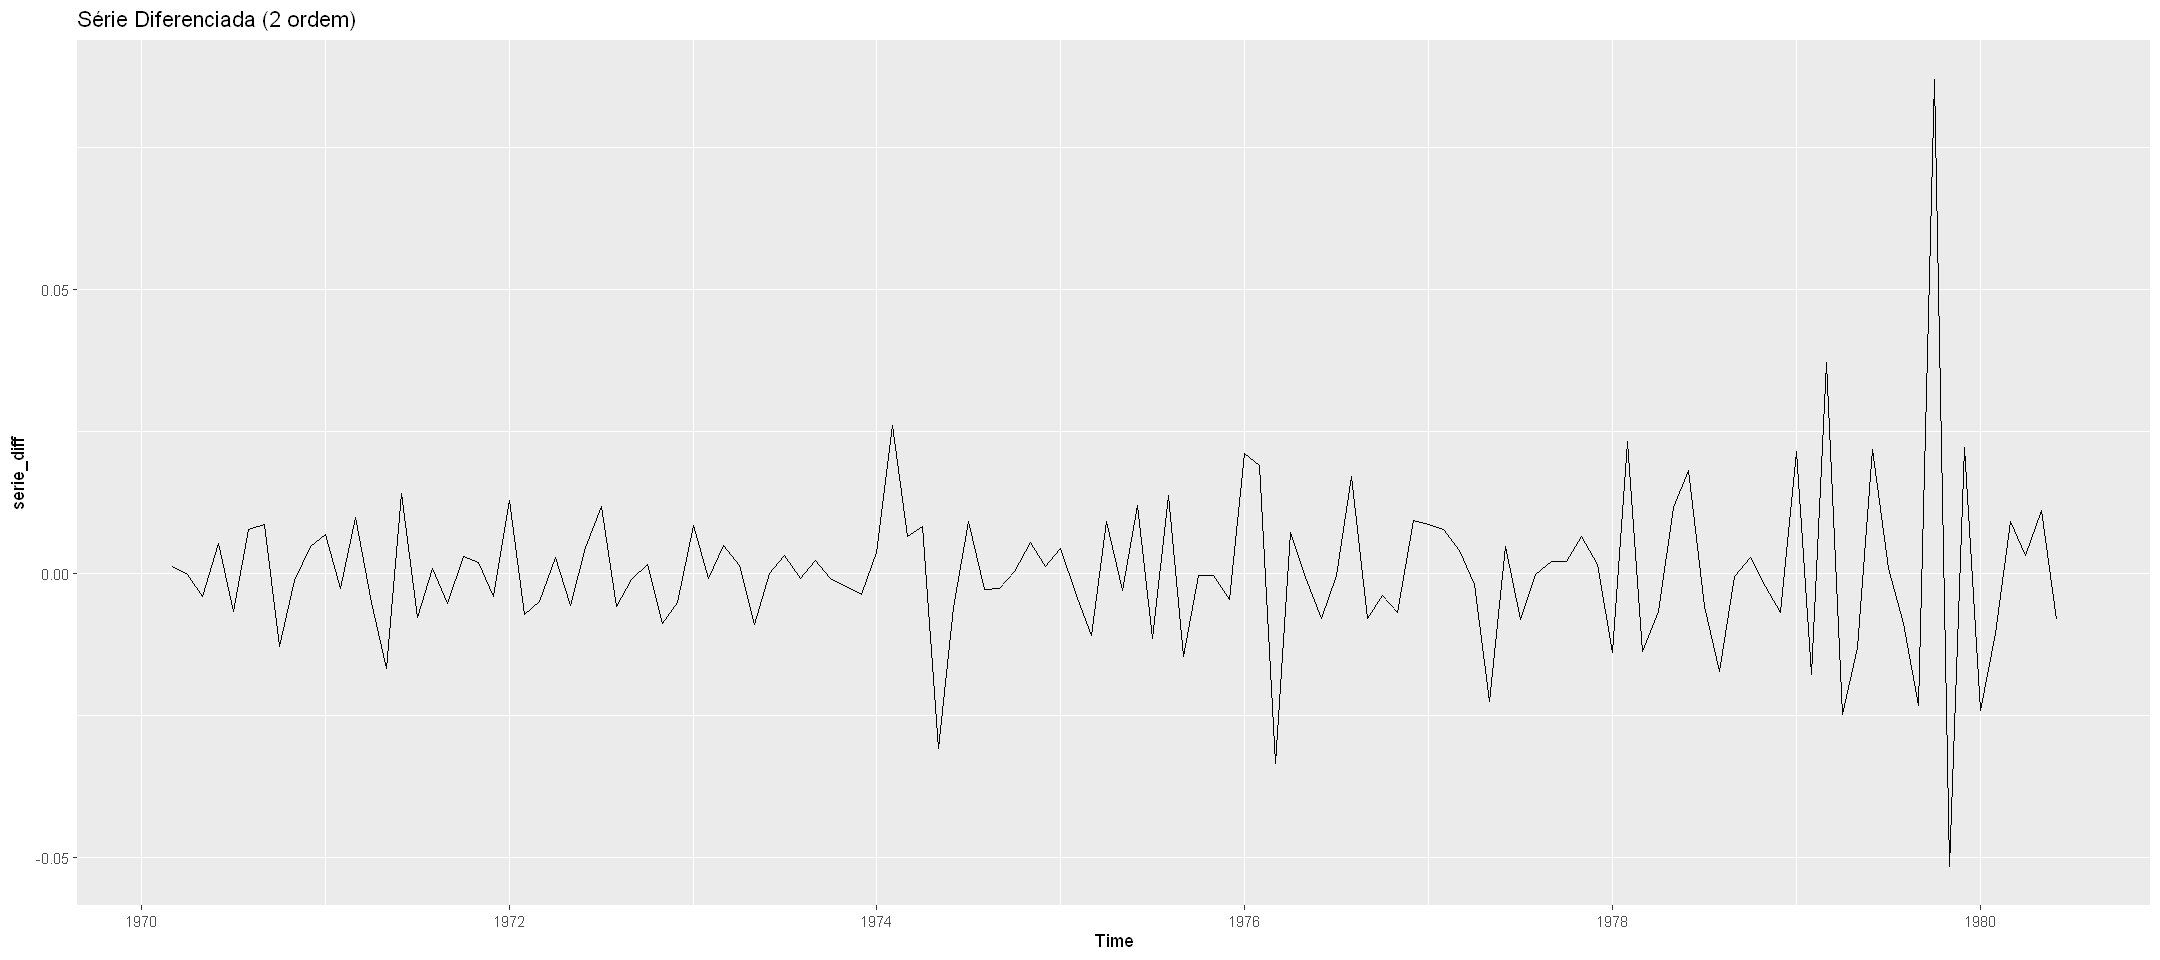

In [7]:
# Ver número de diferenciações necessárias
ndiffs(log_serie)     # estacionariedade

# Aplicar diferenciação
serie_diff <- diff(log_serie, differences = 2)

# Teste de estacionariedade
adf.test(serie_diff)

# Plot final
autoplot(serie_diff) + ggtitle("Série Diferenciada (2 ordem)")

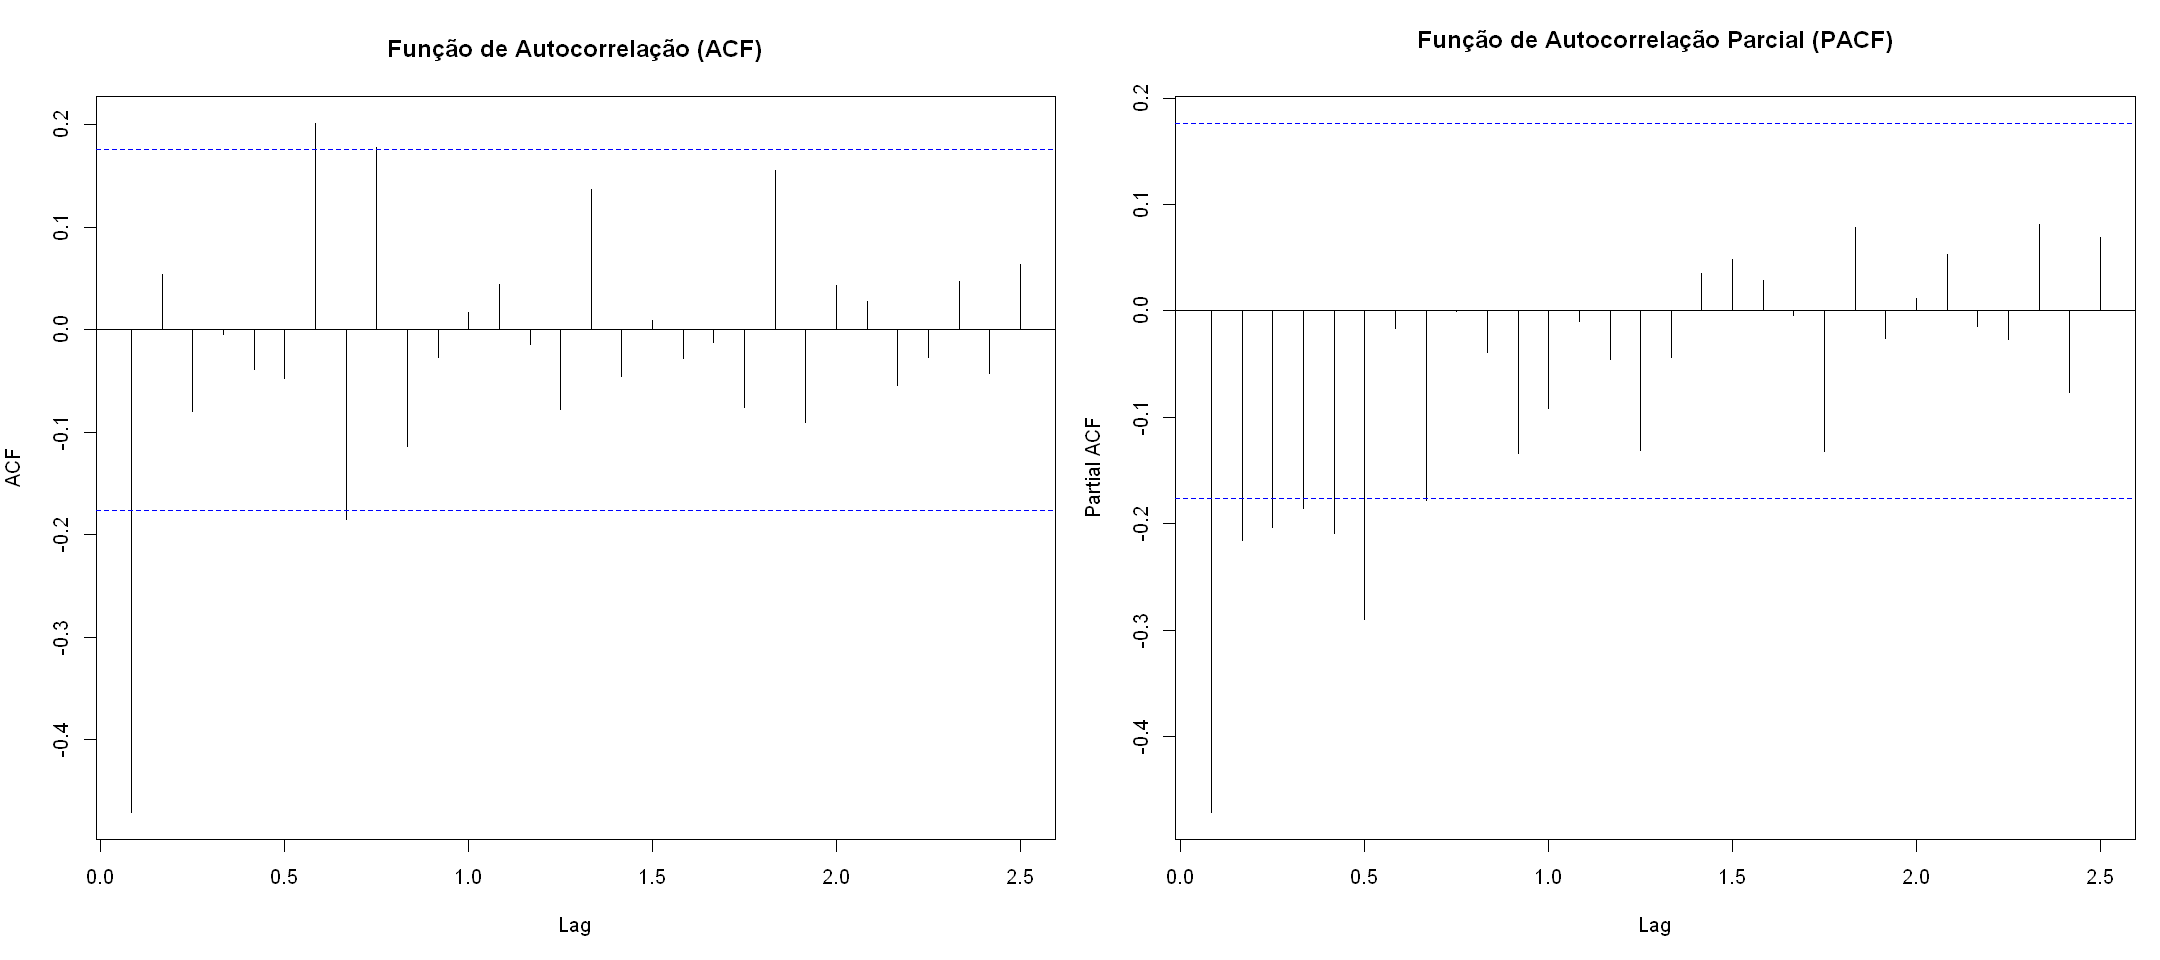

In [8]:
par(bg = "white", mfrow = c(1, 2), mar = c(5, 4, 4, 1))

acf(serie_diff, lag.max = 30, main = "Função de Autocorrelação (ACF)")
pacf(serie_diff, lag.max = 30, main = "Função de Autocorrelação Parcial (PACF)")


par(mfrow = c(1, 1))

In [9]:
eacf(serie_diff)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o x o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x o o o x o o o o o o  o  o  o 
5 x o o o x o o o o o o  o  o  o 
6 o x o x x o o o o o o  o  o  o 
7 o x o o o x o o o o o  o  o  o 


In [10]:
auto.arima(serie_diff)

Series: serie_diff 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1   mean
      -0.8912  3e-04
s.e.   0.0530  1e-04

sigma^2 = 0.0001289:  log likelihood = 379.58
AIC=-753.16   AICc=-752.96   BIC=-744.7

In [11]:
arima(serie_diff, order = c(3, 0, 1))


Call:
arima(x = serie_diff, order = c(3, 0, 1))

Coefficients:
         ar1     ar2      ar3      ma1  intercept
      0.1267  0.0733  -0.0802  -0.9278      3e-04
s.e.  0.1140  0.1062   0.1035   0.0820      1e-04

sigma^2 estimated as 0.0001237:  log likelihood = 381.03,  aic = -752.06

In [12]:
arima(serie_diff, order = c(1, 0, 1))


Call:
arima(x = serie_diff, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.1333  -0.9313      3e-04
s.e.  0.1085   0.0624      1e-04

sigma^2 estimated as 0.000125:  log likelihood = 380.37,  aic = -754.74

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,,,,,,,-0.0037598113,-0.0002713694,0.0001936502,0.0002556387,0.0002639019,0.0002650035
1981,0.0002651503,0.0002651699,0.0002651725,0.0002651728,0.0002651729,0.0002651729,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,,,,,,,0.01118051,0.01430404,0.01435339,0.01435427,0.01435429,0.01435429
1981,0.01435429,0.01435429,0.01435429,0.01435429,0.01435429,0.01435429,,,,,,


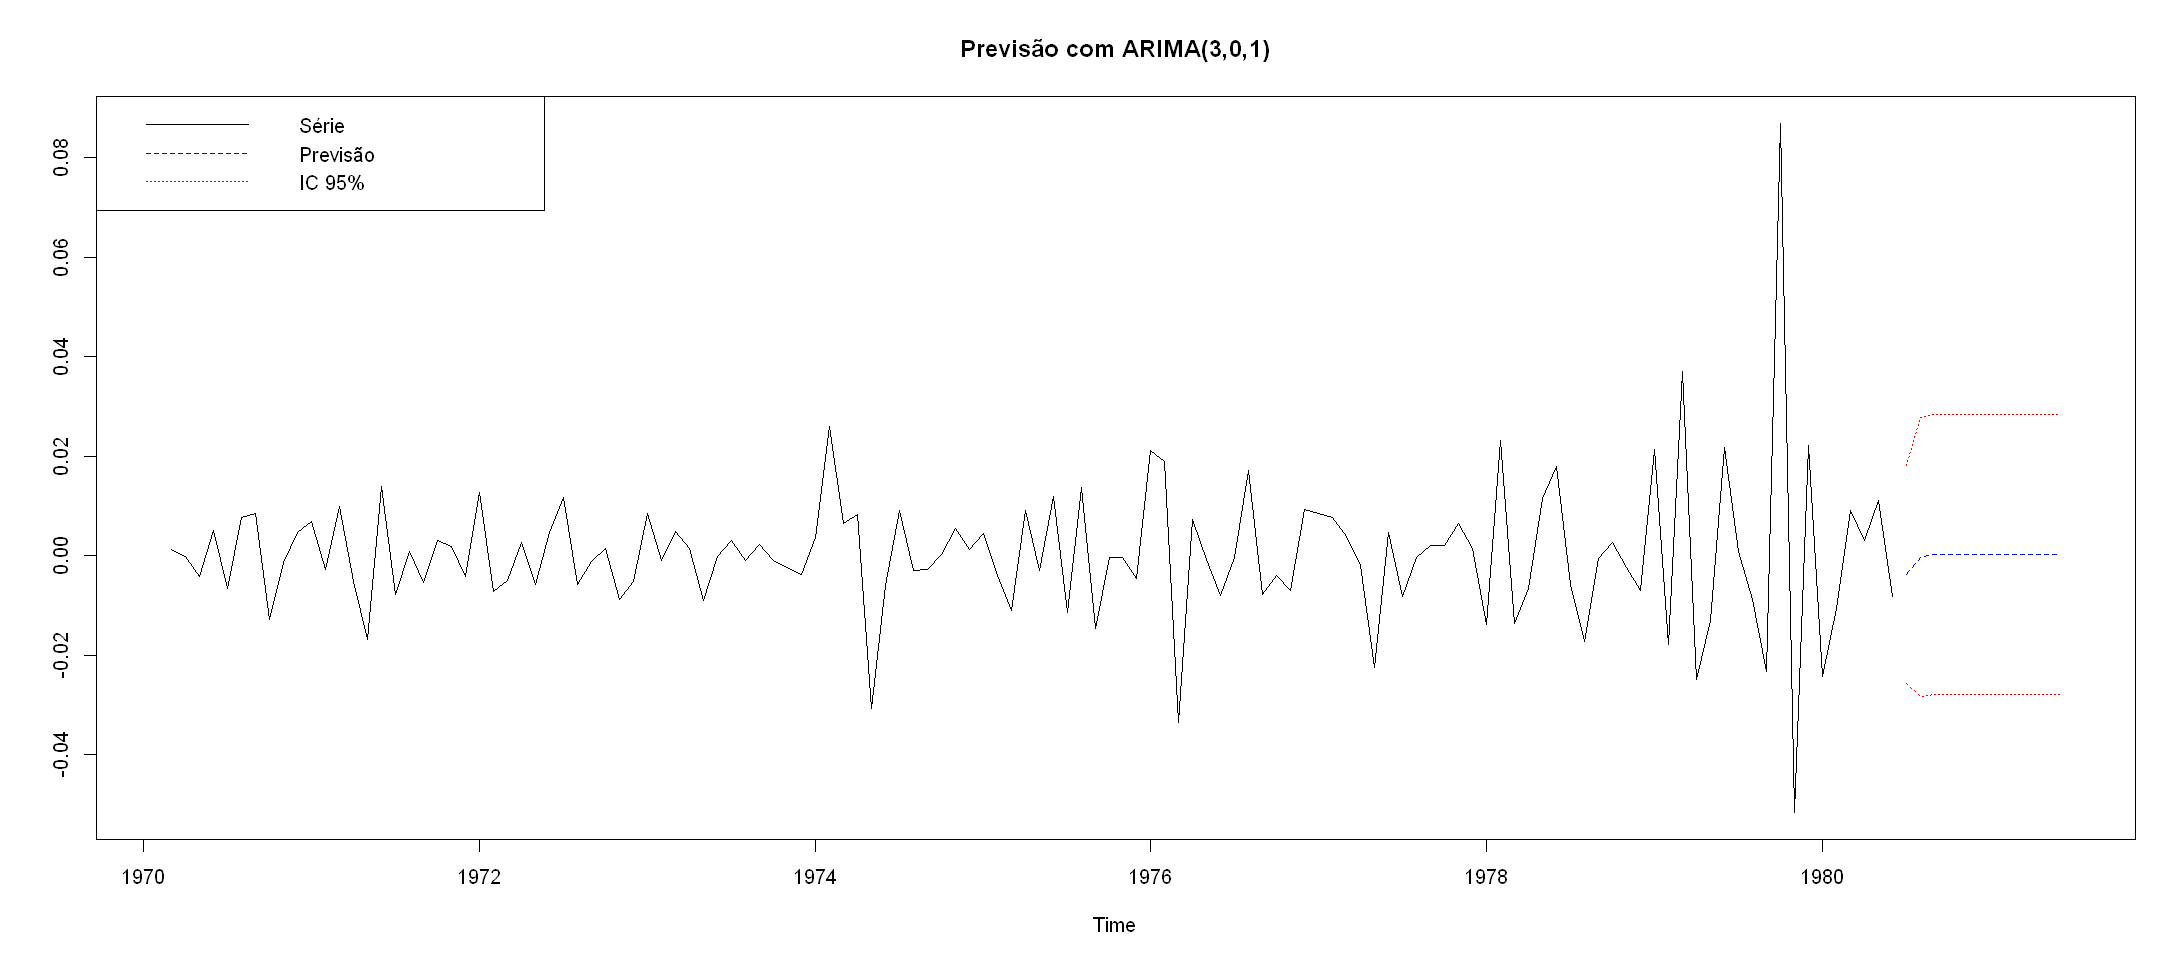

In [13]:
modelo <- arima(serie_diff, order = c(1, 0, 1))  # seu modelo ajustado

# Prever os próximos 12 períodos (por exemplo)
previsao <- predict(modelo, n.ahead = 12)

# Visualizar os valores previstos
previsao$pred  # valores centrais
previsao$se    # erro padrão de previsão

upper <- previsao$pred + 1.96 * previsao$se
lower <- previsao$pred - 1.96 * previsao$se

par(bg = "white", mfrow = c(1, 1), mar = c(5, 4, 4, 1))

# Plot da série + previsão
ts.plot(serie_diff, previsao$pred, col = c("black", "blue"), lty = c(1,2), main = "Previsão com ARIMA(3,0,1)")
lines(upper, col = "red", lty = 3)
lines(lower, col = "red", lty = 3)
legend("topleft", legend = c("Série", "Previsão", "IC 95%"), col = c("black", "blue", "red"), lty = c(1,2,3))

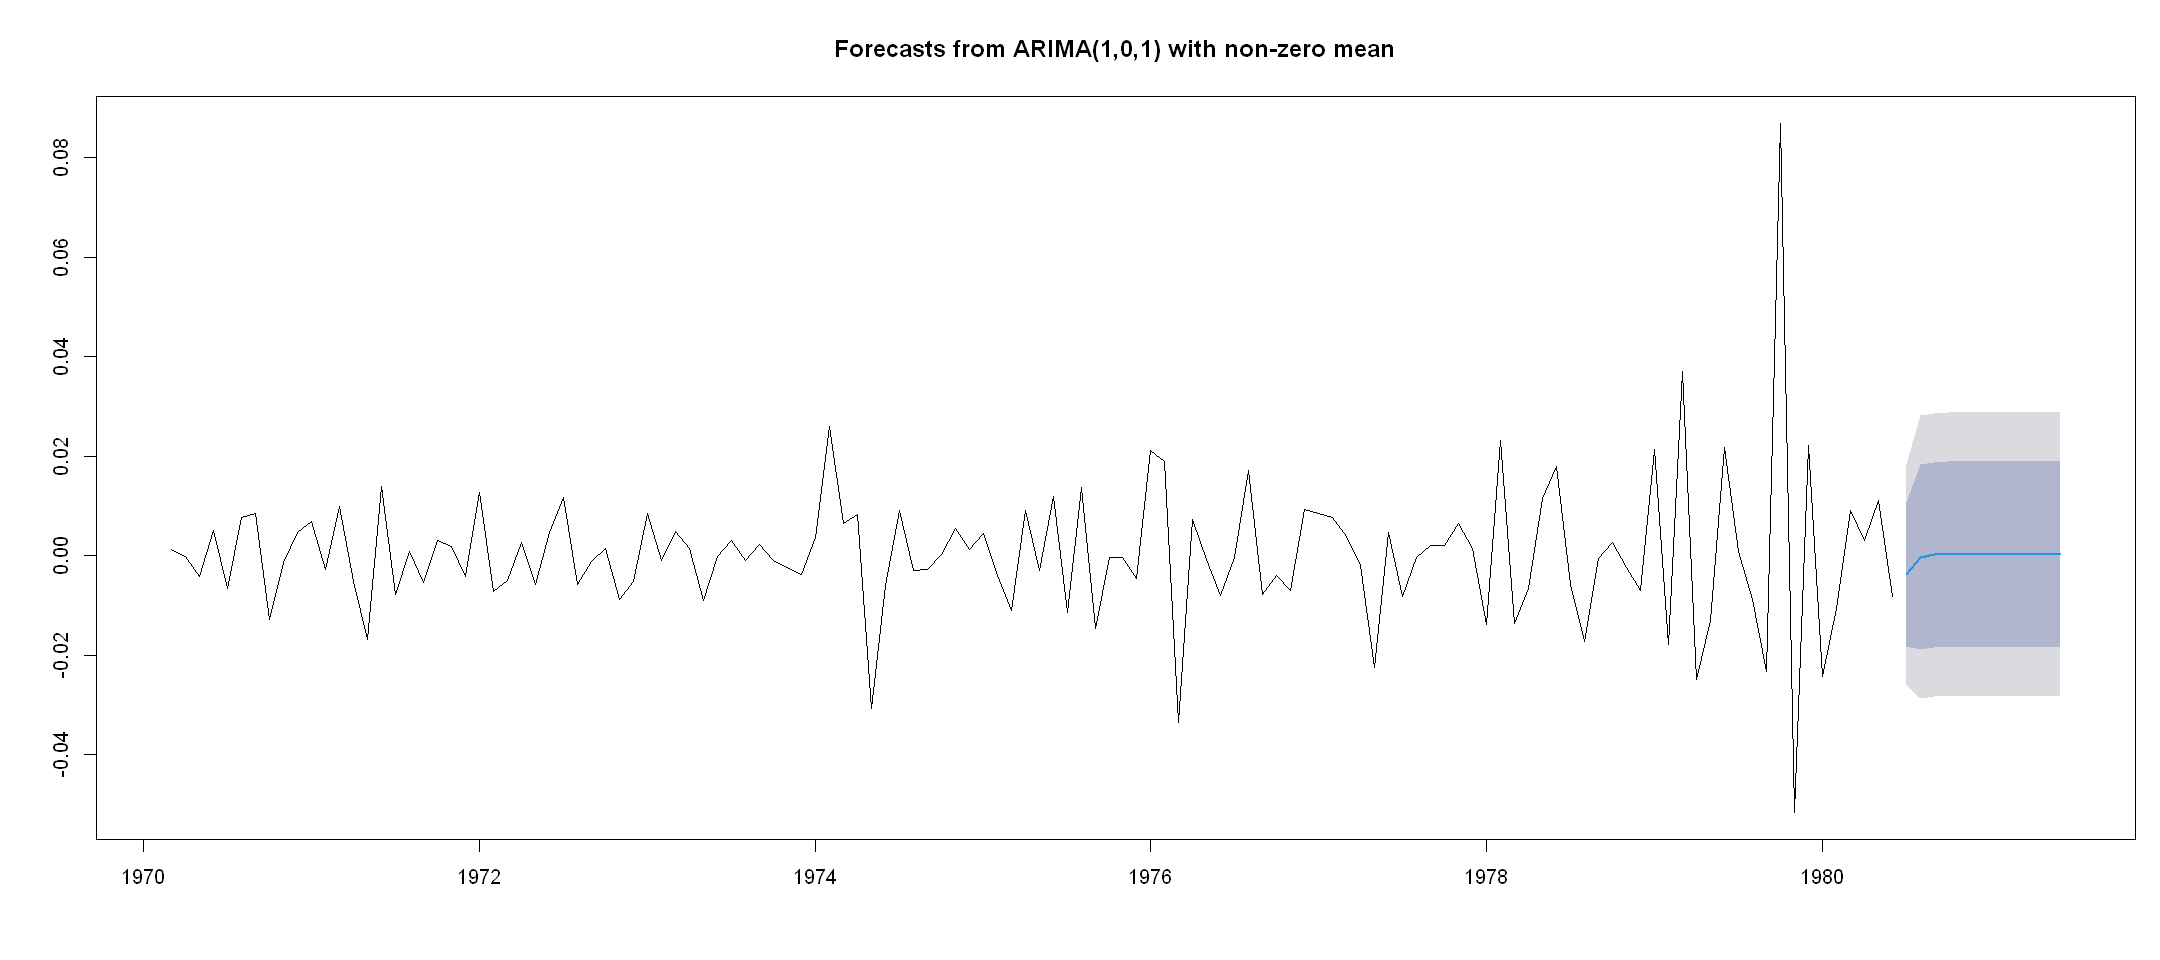

In [14]:
modelo <- Arima(serie_diff, order = c(1, 0, 1))

# Prever 12 passos à frente
fcast <- forecast(modelo, h = 12)

par(bg = "white", mfrow = c(1, 1), mar = c(5, 4, 4, 1))
# Plot bonito com ICs
plot(fcast)

In [15]:
# Supõe que você tem a última observação da série original
ultima_obs <- tail(serie_ts, 1)

# Reconstruir a previsão na escala original
previsao_original <- cumsum(c(ultima_obs, fcast$mean))
previsao_original <- previsao_original[-1]

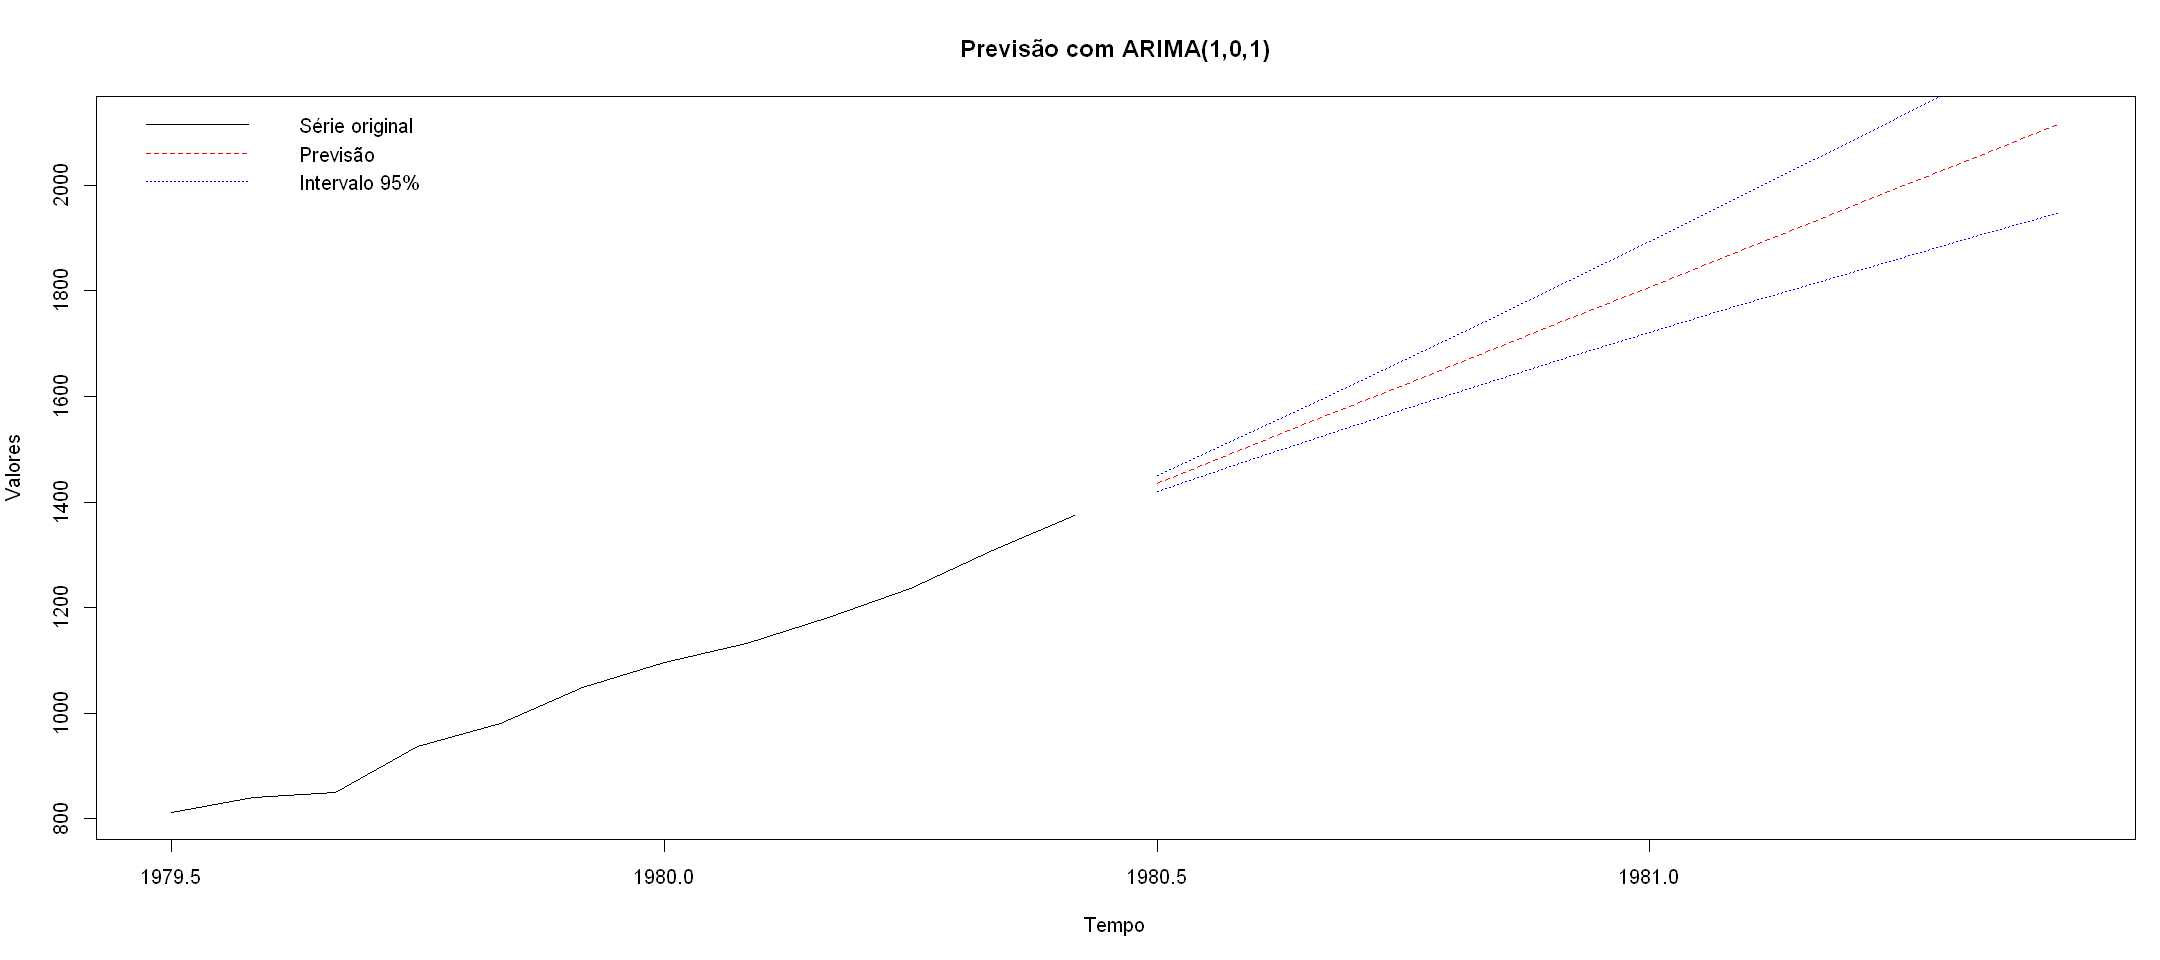

In [ ]:
# Ajusta o modelo
modelo <- arima(serie_ts, order = c(1, 2, 1))

# Faz a previsão
previsao <- predict(modelo, n.ahead = 12)

# Cria um vetor de tempo para a previsão
inicio_prev <- time(serie_ts)[length(serie_ts)] + deltat(serie_ts)
tempo_prev <- seq(from = inicio_prev, by = deltat(serie_ts), length.out = 12)

# Converte previsão para ts
prev_ts <- ts(previsao$pred, start = inicio_prev, frequency = frequency(serie_ts))
upper <- ts(previsao$pred + 1.96 * previsao$se, start = inicio_prev, frequency = frequency(serie_ts))
lower <- ts(previsao$pred - 1.96 * previsao$se, start = inicio_prev, frequency = frequency(serie_ts))

# Plot
par(bg = "white", mfrow = c(1, 1), mar = c(5, 4, 4, 1))
ts.plot(window(serie_ts, start = time(serie_ts)[115]),
        prev_ts,
        col = c("black", "red"), 
        lty = c(1,2),
        main = "Previsão com ARIMA(1,0,1)",
        ylab = "Valores",
        xlab = "Tempo")

# Intervalos de confiança
lines(upper, col = "blue", lty = 3)
lines(lower, col = "blue", lty = 3)

# Legenda
legend("topleft",
       legend = c("Série original", "Previsão", "Intervalo 95%"),
       col = c("black", "red", "blue"), lty = c(1, 2, 3), bty = "n")
